In [58]:
using ForwardDiff
using Turing
using Plots
using LinearAlgebra
using StatsPlots
using Optim
using Distributions

In [90]:
n_data = 2000
true_m = [1.0, 2.0]
true_c = [0.3 0.0; 0.0 0.5]
data = rand(MvNormal(true_m, true_c), n_data)

2×2000 Matrix{Float64}:
 0.58635   1.05589  0.739179  1.63143  …  1.56265  0.7319   0.735017  1.37298
 0.873099  1.75624  3.27696   1.18326     2.75379  1.82895  2.55193   1.00895

In [91]:
function get_mean_loss(m1, m2, s1, s2)
    theory = rand(MvNormal([m1, m2], [s1 0; 0 s2]), n_data)
    loss = mean(@.(data-theory))
    return loss
end;

In [92]:
get_mean_loss(1, 2, 1, 1)

0.0006545654790698377

In [93]:
get_mean_loss(5, -1, 1, 2)

-0.5377337953910896

In [79]:
@model function model(data)
    m1 ~ Uniform(-3.0, 3.0)
    m2 ~ Uniform(-3.0, 3.0)
    s1 ~ Uniform(0.0, 2.0)
    s2 ~ Uniform(0.0, 2.0)
    for i in 1:n_data
        data[:,i] ~ MvNormal([m1, m2], [s1 0; 0 s2])
    end
end;

In [80]:
map_estimate = optimize(model(data), MAP(), NelderMead())

ModeResult with maximized lp of -5706.12
4-element Named Vector{Float64}
A   │ 
────┼────────
:m1 │ 1.00899
:m2 │ 2.01323
:s1 │ 1.00782
:s2 │ 1.01776

In [84]:
iterations = 5000
nadapts = 1000
new_chain = sample(model(data), MH(), iterations,
                   nadapt=nadapts, progress=true; save_state=true);

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:27


In [85]:
describe(new_chain)[1]

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat   es ⋯
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64      ⋯

          m1    1.0685    0.0840     0.0012    0.0097   14.7818    1.1910      ⋯
          m2    2.0564    0.1663     0.0024    0.0167   14.7683    1.4640      ⋯
          s1    1.0777    0.2268     0.0032    0.0265   13.3642    1.1257      ⋯
          s2    1.1831    0.1845     0.0026    0.0210   13.9473    1.0735      ⋯
                                                                1 column omitted


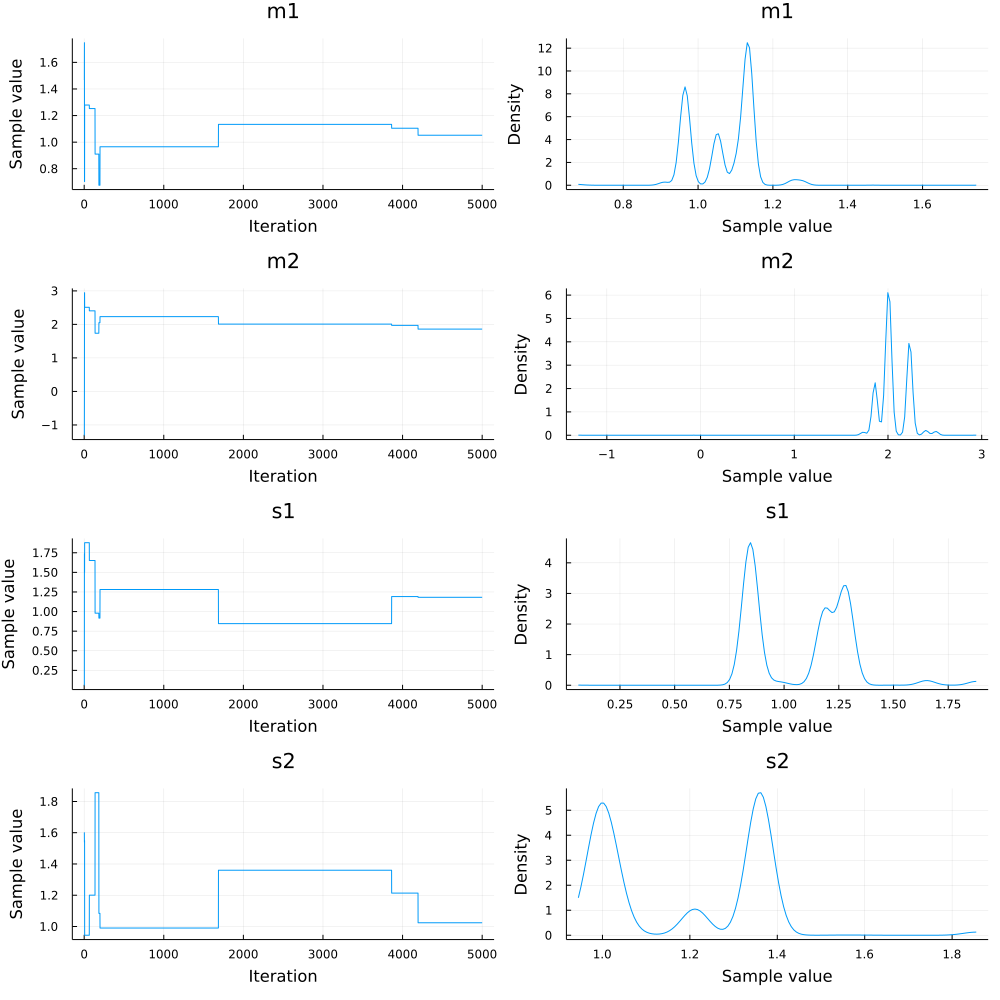

In [86]:
plot(new_chain)

In [94]:
iterations = 1000
adaptation = 100
TAP = 0.6

new_chain = sample(model(data), NUTS(adaptation, TAP),
            iterations, progress=true; save_state=true)

┌ Info: Found initial step size
│   ϵ = 0.0125
└ @ Turing.Inference /home/jaime/.julia/packages/Turing/uMoX1/src/inference/hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /home/jaime/.julia/packages/AdvancedHMC/w90s5/src/hamiltonian.jl:47
Sampling: 100%|█████████████████████████████████████████| Time: 0:01:18


Chains MCMC chain (1000×16×1 Array{Float64, 3}):

Iterations        = 101:1:1100
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 79.39 seconds
Compute duration  = 79.39 seconds
parameters        = m1, m2, s1, s2
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

          m1    1.0048    0.0126     0.0004    0.0003   962.8730    0.9994     ⋯
          m2    1.9581    0.0170     0.0005    0.0006   599.5923    1.0044     ⋯
          s1    0.3027    0.0095     0.0003    0.0004   571.2309    1.0098     ⋯
          s2    0.5189    0.0159     0.0005    0.0007   481.3494    1.0047     ⋯
                                                          

In [95]:
describe(new_chain)[1]

Summary Statistics
  parameters      mean       std   naive_se      mcse        ess      rhat   e ⋯
      Symbol   Float64   Float64    Float64   Float64    Float64   Float64     ⋯

          m1    1.0048    0.0126     0.0004    0.0003   962.8730    0.9994     ⋯
          m2    1.9581    0.0170     0.0005    0.0006   599.5923    1.0044     ⋯
          s1    0.3027    0.0095     0.0003    0.0004   571.2309    1.0098     ⋯
          s2    0.5189    0.0159     0.0005    0.0007   481.3494    1.0047     ⋯
                                                                1 column omitted


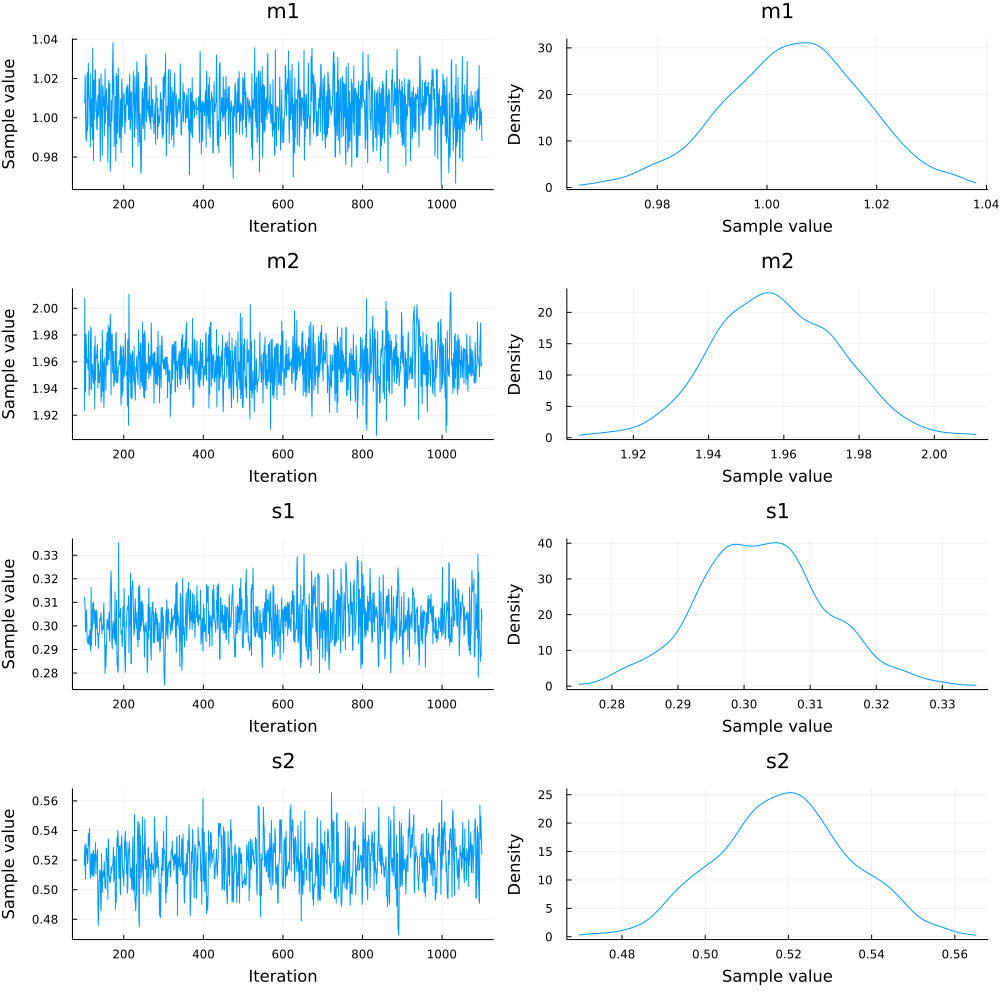

In [96]:
plot(new_chain)